In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


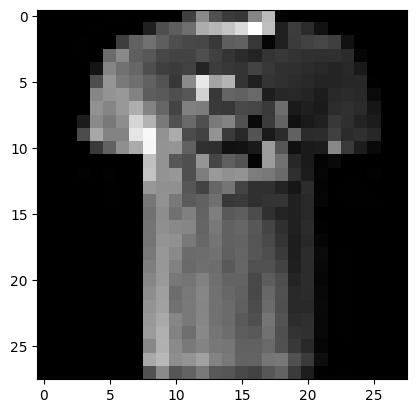

Label: 0


In [2]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size =64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img,cmap = "gray")  # matplotlib의 시각화 함수
plt.show()
print(f"Label: {label}")

In [3]:
#transform
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = "data",
    train=True,
    download = True,
    transform = ToTensor(),
    target_transform = Lambda(lambda y:torch.zeros(10, dtype = torch.float).scatter_(0,torch.tensor(y),value=1))
)

In [4]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [6]:
X = torch.rand(1,28,28, device = device)  # 28*28 크기의 흑백 이미지 1장 랜덤 생성
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)  # logits를 확률 값으로 변환 (Softmax 함수 : 각 클래스에 대한 값을 0~1 사이의 확류로 바꾸고 총합을 1이 되게 만듦)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


In [7]:
# 모델 계층
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [8]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

layer1 = nn.Linear(in_features = 28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[-0.0597, -0.5945,  0.1571, -0.3142,  0.6179,  0.5900, -0.1318,  0.3048,
          0.1559, -0.9571,  0.1015, -0.0594,  0.2620,  0.4942, -0.0289, -0.1853,
         -0.3559, -0.0658, -0.4349, -0.2508],
        [-0.0875, -0.5301,  0.3015, -0.0613,  0.7265,  0.4976, -0.0883,  0.2290,
          0.0316, -0.8860,  0.1203,  0.4620,  0.1643, -0.0567, -0.2489,  0.0890,
         -0.3189,  0.0486, -0.3603, -0.3761],
        [ 0.1708, -0.5272,  0.2507, -0.2023,  0.5128,  0.3885, -0.0133, -0.0792,
          0.1003, -0.9706,  0.2061,  0.2506, -0.0528, -0.1218, -0.2759,  0.0212,
         -0.1780, -0.2100, -0.7066,  0.1694]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.1571, 0.0000, 0.6179, 0.5900, 0.0000, 0.3048, 0.1559,
         0.0000, 0.1015, 0.0000, 0.2620, 0.4942, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.3015, 0.0000, 0.7265, 0.4976, 0.0000, 0.2290, 0.0316,
         0.0

In [9]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20,10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]}\n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0021,  0.0007,  0.0290,  ...,  0.0108, -0.0119, -0.0275],
        [ 0.0272, -0.0066,  0.0233,  ..., -0.0348,  0.0226, -0.0332]],
       device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0204, -0.0081], device='cuda:0', grad_fn=<SliceBackward0>)

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 2.1534e-03, -1.1703e-02,  4.0372e-02,  ..., -1.2118e-02,
          2.2488e-03,  2.6670e-02],
        [ 9.9130e-05,  2.7478e-02, -3.9091e-03,  ..., -4.0509e-02,
        

In [ ]:
import torch
x = torch.ones(5)   #input tensor     
y = torch.zeros(3)   #expected output    
w = torch.randn(5,3,requires_grad=True)  # requires_grad = True는 텐서를 생성할 때 설정하거나, x.requires_grad_(True) 메소드를 사용하여 나중에 설정 가능
b = torch.randn(3,requires_grad=True)  #requires_grad는 생략이 가능한데, False가 기본적으로 설정되어 있음, 이러한 것들은 고정된 매개변수
z= torch.matmul(x,w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)

print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x0000020E2BA8A470>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x0000020E4537FEE0>


In [15]:
loss.backward()  # 해당 메서드를 통해서 w와 b에 대해 미분 / 원래 w와 b의 변수에 grad 속성의 초기값은 None이었지만, 해당 메서드를 호출하면서 PyTorch가 loss를 각 파라미터에 대해 미분하여 grad 속성에 기울기 값이 저장됨
print(w.grad)
print(b.grad)

tensor([[0.3052, 0.0055, 0.1681],
        [0.3052, 0.0055, 0.1681],
        [0.3052, 0.0055, 0.1681],
        [0.3052, 0.0055, 0.1681],
        [0.3052, 0.0055, 0.1681]])
tensor([0.3052, 0.0055, 0.1681])


In [17]:
z = torch.matmul(x,w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x,w)+b
print(z.requires_grad)

True
False
